In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
predictions_df = pd.read_csv('Predictions_data.csv')
predictions_df

,True Labels,Random Forest,Gradient Boosting
0,3,3,3
1,3,3,3
2,2,3,3
3,2,2,2
4,3,3,3
...,...,...,...
235,2,2,2
236,3,3,3
237,3,3,3
238,3,3,3


In [3]:
df = pd.read_excel('raw_data.8.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
processed_data = pd.read_csv('processed_data.csv')

# Goal 1  :  Department wise Performance

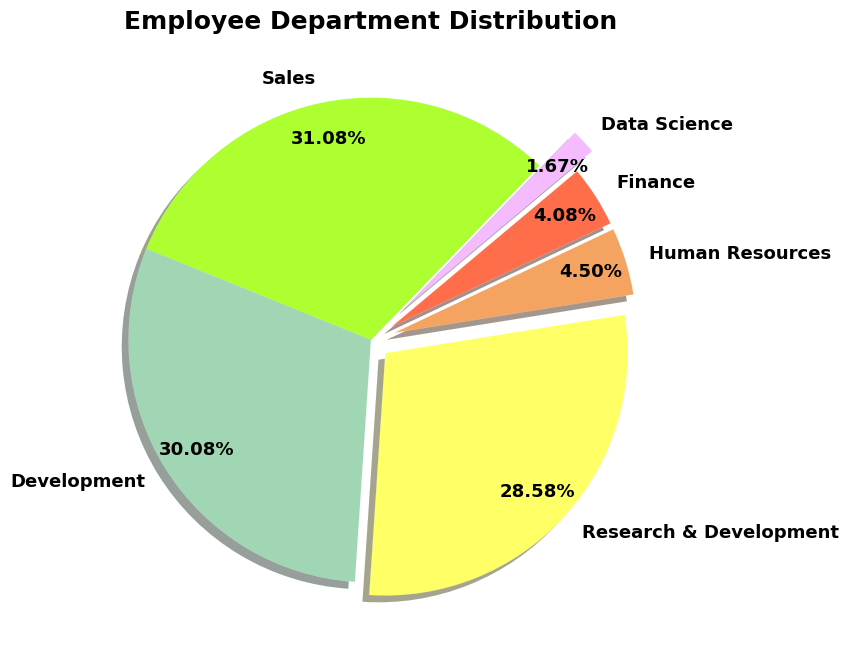

In [5]:
# Calculate the percentage of employees in each department
percent_1 = df['EmpDepartment'].value_counts()

# Set up the pie chart properties
wedgeprops = {"linewidth": 0.1, 'width': 1, "edgecolor": "w"}
plt.figure(figsize=(10, 8))

# Define colors for each department
color = ["#adff2f", "#a0d6b4", "#ffff66", "#f4a460", "#ff6e4a", "#f4bbff"]

# Create the pie chart
plt.pie(percent_1, 
        labels=percent_1.index,  # Department names
        autopct="%0.2f%%",        # Show percentage
        startangle=46,            # Start angle for the chart
        shadow=True,              # Add shadow
        pctdistance=0.85,         # Distance of percentage text
        wedgeprops=wedgeprops,    # Apply the wedge properties
        textprops={"fontsize": 13, "fontweight": "bold"},  # Customize text
        explode=[0, 0, 0.08, 0.1, 0.1, 0.2],  # Explode effect on some slices
        colors=color)  # Set custom colors

# Title and display settings
plt.title("Employee Department Distribution", fontsize=18, fontweight='bold')
plt.tight_layout(pad=6)
plt.show()

- This image shows the distribution of employees across different departments in a company

## Department wise employee performance

In [6]:
df.groupby(by ='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

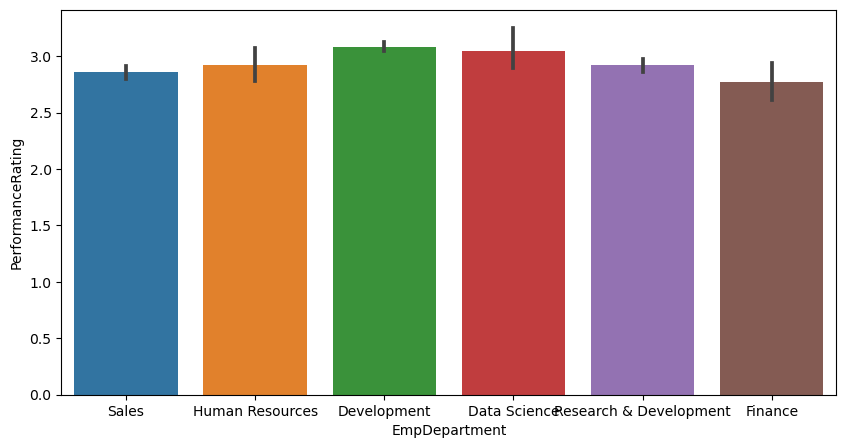

In [7]:
plt.figure(figsize =(10,5))
sns.barplot(x = df['EmpDepartment'], y = df['PerformanceRating'])

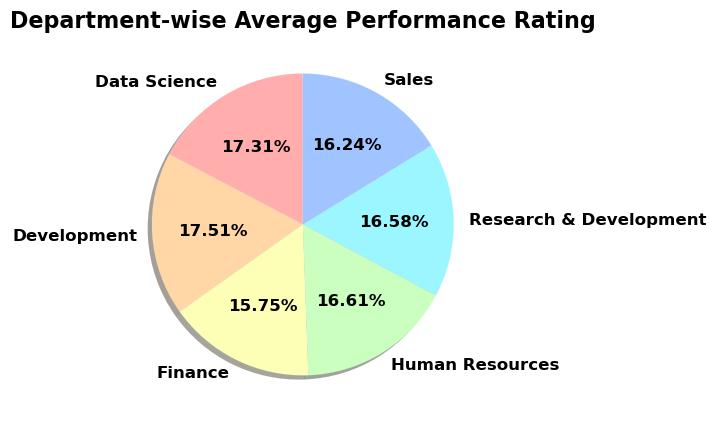

In [8]:
# Calculate department-wise average performance rating
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean()

# Plotting the pie chart
plt.figure(figsize=(8,8))

# Pie chart properties
wedgeprops = {"linewidth": 0.1, 'width': 1, "edgecolor": "w"}
colors = ["#ffadad", "#ffd6a5", "#fdffb6", "#caffbf", "#9bf6ff", "#a0c4ff"]  # Custom colors for each department

# Create the pie chart
plt.pie(department_performance, labels=department_performance.index, 
        autopct='%0.2f%%', startangle=90, shadow=True, 
        wedgeprops=wedgeprops, colors=colors, textprops={"fontsize": 12, "fontweight": "bold"})

# Title and layout
plt.title("Department-wise Average Performance Rating", fontsize=16, fontweight='bold')
plt.tight_layout(pad=5)
plt.show()

- The pie chart shows the average performance ratings for different departments within a company.     
- Data Science and Development have the highest ratings, indicating strong performance in these areas.     
- Research & Development and Human Resources also show good performance.     
- Finance and Sales have the lowest ratings, suggesting potential areas for improvement.    
- Overall, the company maintains a consistent level of performance across departments.    

# Goal 2 : Top 3 Important Factors Affecting Employee Performance

In [9]:
x = processed_data.drop(columns=['PerformanceRating'])

In [10]:
y = processed_data['PerformanceRating']

In [11]:
rf = joblib.load('random_forest_model.pkl') 

# Get feature importances from the model
importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importances
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,  # This is the original DataFrame column names
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 3 important features
top_3_features = feature_importance_df.head(5)
print(top_3_features)

                         Feature  Importance
16      EmpLastSalaryHikePercent    0.261061
9     EmpEnvironmentSatisfaction    0.203451
23       YearsSinceLastPromotion    0.110139
5                     EmpJobRole    0.049966
22  ExperienceYearsInCurrentRole    0.048712


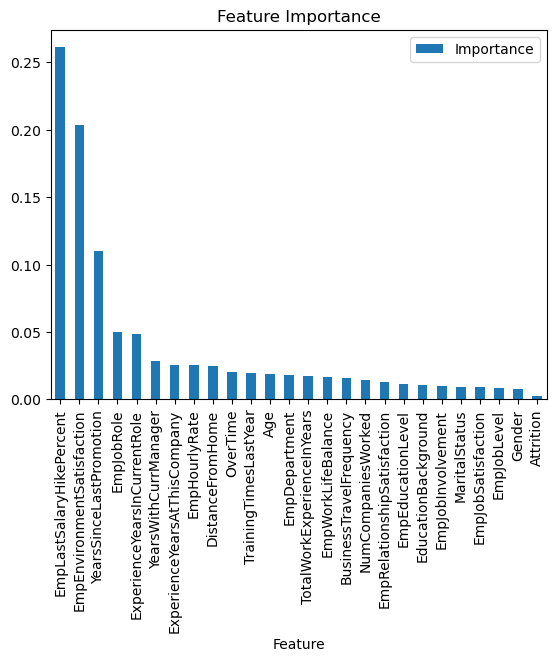

In [12]:
# Plot the feature importances
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', title='Feature Importance')
plt.show()

The given image shows a feature importance plot from a machine learning model. The top three most important features are:    
- **EmpLastSalaryHikePercent**    
- **EmpEnvironmentSatisfaction**     
- **YearsSinceLastPromotion**     
These features significantly influence the model's predictions. Other features like EmpJobRole and ExperienceYearsInCurrentRole also contribute, but to a lesser extent. Many features at the bottom have negligible importance.

# Goal 3 : A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

In this project, we trained multiple models to predict employee performance based on various factors such as work experience, job satisfaction, and training. After evaluating all models, Random Forest and Gradient Boosting was identified as the best model with an accuracy of 93%.    

To demonstrate its application, we used a random sample from the test data to simulate how the model would predict the performance of a new candidate. This model can now be used by HR departments or hiring managers to assess the suitability of candidates based on their performance predictions, ensuring better decision-making in hiring.    

We used the following steps:

- Trained the Random Forest & Gradient Boosting models on historical employee performance data.    

- Applied the trained model to predict the performance of a randomly selected employee from the test set.   

- The model provides an output that indicates the predicted performance, which can be used to make informed decisions about hiring candidates.   


This trained model can be easily integrated into HR tools to assess the potential of new hires, providing valuable insights into how they might perform in the role.

### Trained model to predict employee performance

In [13]:
# Step 1: Load the trained GradientBoosting model
model = joblib.load('gradient_boosting_model.pkl')  # Adjust the model path if needed

# Step 2: Load your processed data (X_test)
X_test = pd.read_csv('processed_data.csv')  # Adjust this path if needed

# Drop the target column (e.g., PerformanceRating) if it's included in X_test
X_test = X_test.drop(columns=['PerformanceRating'])  # Adjust based on your actual target column name

# Step 3: Select a random row from X_test
random_index = np.random.randint(0, len(X_test))  # Select a random index from the test set
random_candidate_data = X_test.iloc[random_index].values.reshape(1, -1)  # Convert Series to numpy array and reshape

# Step 4: Predict performance using the trained model
predicted_performance = model.predict(random_candidate_data)

# Step 5: Display the predicted performance for the randomly selected candidate
print("Predicted Employee Performance for randomly selected candidate:", predicted_performance[0])

# If performance score is high (adjust threshold based on your model’s output), hire the candidate
if predicted_performance[0] >= 3:  # Assuming score >= 3 is considered good
    print("Hire the candidate!")
else:
    print("Do not hire the candidate.")

Predicted Employee Performance for randomly selected candidate: 2
Do not hire the candidate.


In [14]:
# Random candidate from the test set
random_candidate = X_test.sample(1)

# Predict performance
predicted_performance = model.predict(random_candidate)

print(f"Predicted Performance: {predicted_performance[0]}")

Predicted Performance: 3


# Goal 4 : Recommendations to improve the employee performance

## Enhancing Employee Performance : A Strategic Data-Driven Approach

After analyzing departmant wise performance and identifying key factors influencing productivity, here are targeted recommendations for improvement:

### 1. Enhance Employee Satisfaction and Engagement :

- Regular Feedback and Recognition: Implement a system for frequent feedback and recognition to boost morale and motivation.
- Work-Life Balance Initiatives: Promote work-life balance through flexible work arrangements and wellness programs.
- Employee Development Programs: Invest in training and development opportunities to enhance skills and knowledge.
- Transparent Communication: Foster open communication channels to address concerns and build trust.

### 2. Optimize Performance Management :

- Clear Performance Expectations: Set clear and measurable performance goals.
- Regular Performance Reviews: Conduct regular performance reviews to provide feedback and identify areas for improvement.
- Performance-Based Incentives: Implement performance-based incentives to reward top performers.

### 3. Foster a Postivie Work Culture

- Strong Leadership: Provide strong leadership and mentorship to guide and inspire employees.
- Team Building Activities: Organize team-building activities to improve collaboration and teamwork.
- Positive Workplace Environment: Create a positive and supportive work environment.

### 4. Address Specific Department Needs :

- Data Science: Prioritize data quality and collaboration with other departments.
- Development: Focus on code quality and continuous learning.
- Research & Development: Encourage innovation and experimentation.
- Human Resources: Streamline HR processes and improve employee engagement.
- Finance: Enhance financial reporting and risk management.
- Sales: Improve sales training and customer relationship management.

By implementing these strategies, organizations can significantly improve employee performance, boost productivity, and achieve long-term success.